Dependencies

In [ ]:
 pip



Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                       Show information useful for debugging.
  help                        Show help

In [ ]:
pip install google-colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 5.0 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
klib 1.0.1 requires Jinja2<4.0.0,>=3.0.3, but you have jinja2 3.0.0 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.0 which is incompatible.


In [ ]:
pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt




In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Upload Your CSV file 

In [ ]:
 from google.colab import files
upload=files.upload()

Saving salesdaily.csv to salesdaily (1).csv


In [ ]:
#Daily sales of the drugs in 8 ATC categories, by the single pharmacy store in period of 6 years (last year incomplete).

In [ ]:
pharma_data=pd.read_csv('/content/salesdaily.csv')

In [ ]:
pharma_data.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [ ]:
pharma_data.tail()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday
2105,10/8/2019,0.33,1.730,0.50,44.30,20.0,2.0,2.0,0.00,2019,10,190,Tuesday


In [ ]:
#No of Row(data point) and collumn (feature)

In [ ]:
#More information about dataset 

In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


Handling misiing value
Mean

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
pharma_data['Hour'].mean()

275.94586894586894

In [ ]:
pharma_data['Year'].mean()

2016.4012345679012

In [ ]:
pharma_data.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


In [ ]:
pharma_train=pd.read_csv("/content/salesdaily.csv")
pharma_test=pd.read_csv("/content/salesdaily.csv")

In [ ]:
pharma_train.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [ ]:
pharma_train.tail()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday
2105,10/8/2019,0.33,1.730,0.50,44.30,20.0,2.0,2.0,0.00,2019,10,190,Tuesday


In [ ]:
import tensorflow as tf                 # acts as the framework upon which this model is built
from tensorflow import keras

In [ ]:
pharma_train=pd.read_csv(r'/content/salesdaily.csv')

In [ ]:
pharma_data #finding missing value in data set

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [ ]:
pharma_train.isnull().sum()

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

In [ ]:
pharma_data.shape

(2106, 13)

In [ ]:
pharma_train.shape

(2106, 13)

In [ ]:
pharma_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


In [ ]:
pharma_train.describe() #statical nalysis of numerical column

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


In [ ]:
pharma_train['Hour']

0       248
1       276
2       276
3       276
4       276
       ... 
2101    276
2102    276
2103    276
2104    276
2105    190
Name: Hour, Length: 2106, dtype: int64

In [ ]:
pharma_train['Hour'].describe()

count    2106.000000
mean      275.945869
std         1.970547
min       190.000000
25%       276.000000
50%       276.000000
75%       276.000000
max       276.000000
Name: Hour, dtype: float64

In [ ]:
#selecting features based on general requirement

EDA WITH KLIB LIBRARY



In [ ]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 3.0.0
    Uninstalling Jinja2-3.0.0:
      Successfully uninstalled Jinja2-3.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import klib


In [ ]:
pip install plt.matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement plt.matplotlib (from versions: none)
ERROR: No matching distribution found for plt.matplotlib


In [ ]:
klib.corr_mat(pharma_test)

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
M01AB,1.00,0.19,0.15,0.18,0.03,0.02,0.08,0.09,0.10,0.02,0.05
M01AE,0.19,1.00,0.17,0.29,0.06,0.03,0.09,0.03,0.02,-0.06,0.02
N02BA,0.15,0.17,1.00,0.21,0.18,0.06,0.04,-0.03,-0.23,-0.09,0.03
N02BE,0.18,0.29,0.21,1.00,0.07,0.00,0.22,-0.13,-0.00,0.02,-0.02
N05B,0.03,0.06,0.18,0.07,1.00,0.25,0.04,-0.06,-0.14,0.01,-0.04
N05C,0.02,0.03,0.06,0.00,0.25,1.00,0.01,-0.00,0.01,-0.01,-0.02
R03,0.08,0.09,0.04,0.22,0.04,0.01,1.00,0.01,0.18,-0.02,0.02
R06,0.09,0.03,-0.03,-0.13,-0.06,-0.00,0.01,1.00,0.19,-0.14,0.03
Year,0.10,0.02,-0.23,-0.00,-0.14,0.01,0.18,0.19,1.00,-0.08,-0.02
Month,0.02,-0.06,-0.09,0.02,0.01,-0.01,-0.02,-0.14,-0.08,1.00,-0.01


<BarContainer object of 7 artists>

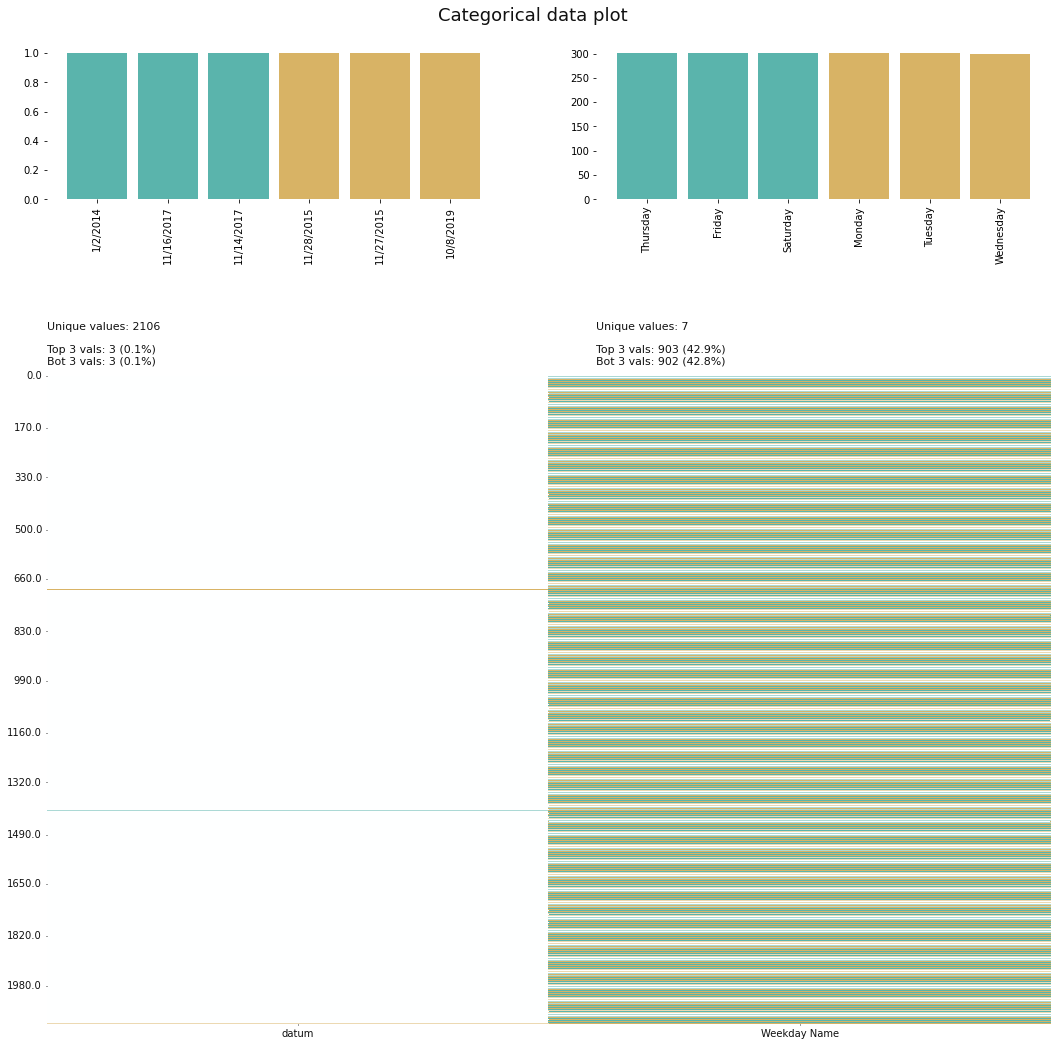

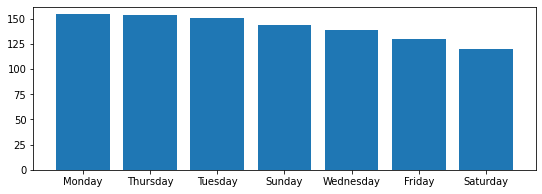

In [ ]:
import klib
klib.cat_plot(pharma_train)
data = {'Monday': 154, 'Thursday': 153, 'Tuesday': 151, 'Sunday': 144, 'Wednesday': 139, 'Friday': 130, 'Saturday': 120}
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(figsize=(9, 3))
axs.bar(names, values)

MISSING VALUE 

In [ ]:
klib.missingval_plot(pharma_data)

No missing values found in the dataset.


CORRELATION


Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


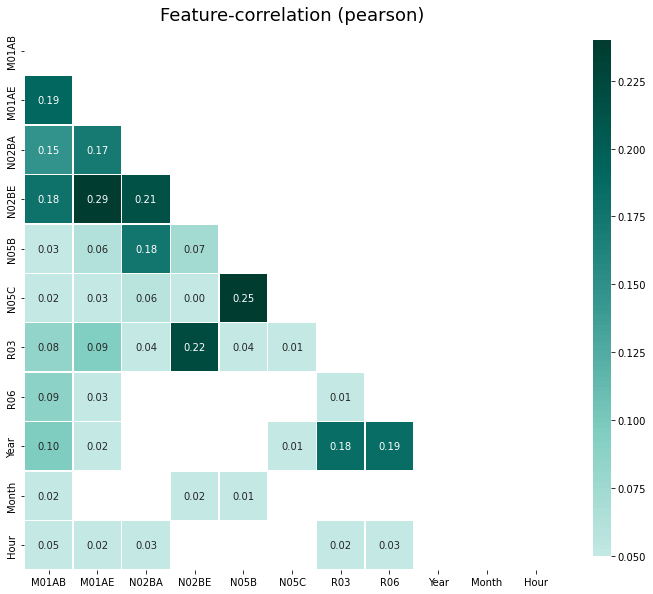

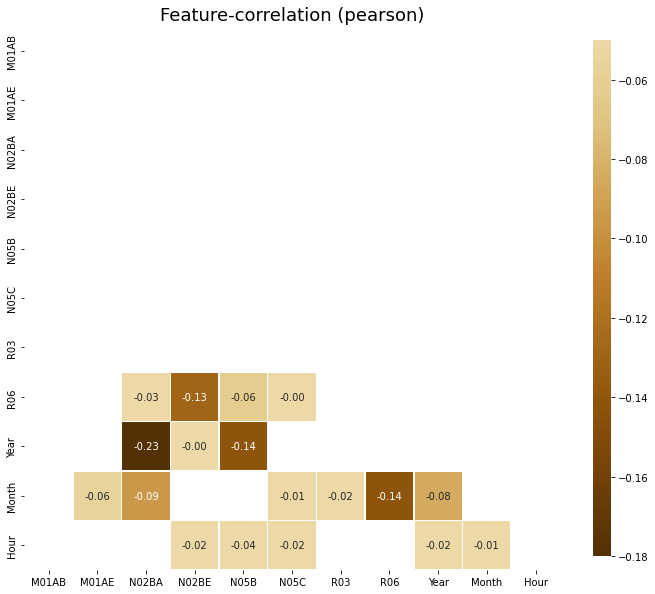

In [ ]:
klib.corr_plot(pharma_data, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
klib.corr_plot(pharma_data, split='neg')
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

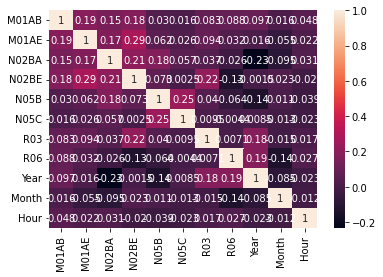

In [ ]:

 sns.heatmap(pharma_train.corr(),annot=True)
 plt.show

In [ ]:
klib.corr_mat(pharma_train) #return a colour encodded correlation matrics

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
M01AB,1.00,0.19,0.15,0.18,0.03,0.02,0.08,0.09,0.10,0.02,0.05
M01AE,0.19,1.00,0.17,0.29,0.06,0.03,0.09,0.03,0.02,-0.06,0.02
N02BA,0.15,0.17,1.00,0.21,0.18,0.06,0.04,-0.03,-0.23,-0.09,0.03
N02BE,0.18,0.29,0.21,1.00,0.07,0.00,0.22,-0.13,-0.00,0.02,-0.02
N05B,0.03,0.06,0.18,0.07,1.00,0.25,0.04,-0.06,-0.14,0.01,-0.04
N05C,0.02,0.03,0.06,0.00,0.25,1.00,0.01,-0.00,0.01,-0.01,-0.02
R03,0.08,0.09,0.04,0.22,0.04,0.01,1.00,0.01,0.18,-0.02,0.02
R06,0.09,0.03,-0.03,-0.13,-0.06,-0.00,0.01,1.00,0.19,-0.14,0.03
Year,0.10,0.02,-0.23,-0.00,-0.14,0.01,0.18,0.19,1.00,-0.08,-0.02
Month,0.02,-0.06,-0.09,0.02,0.01,-0.01,-0.02,-0.14,-0.08,1.00,-0.01


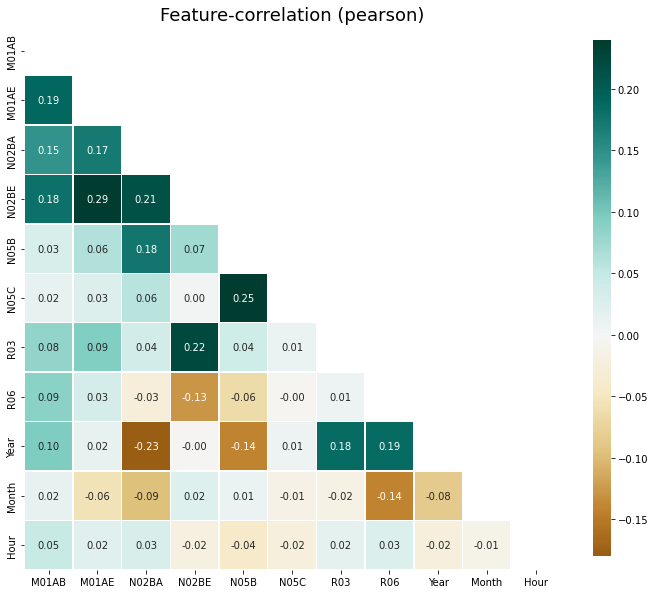

In [ ]:
klib.corr_plot(pharma_train) # return a color encoded heatmap, ideal for correlation

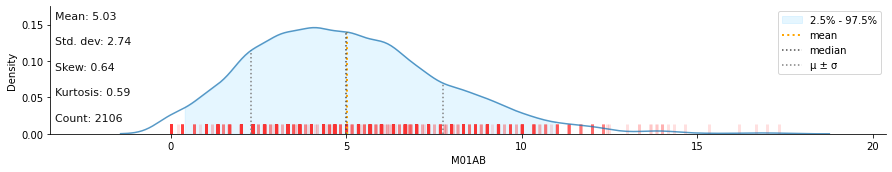

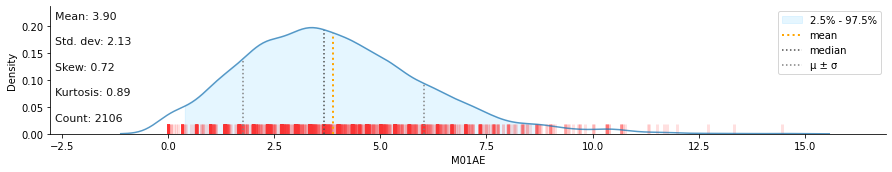

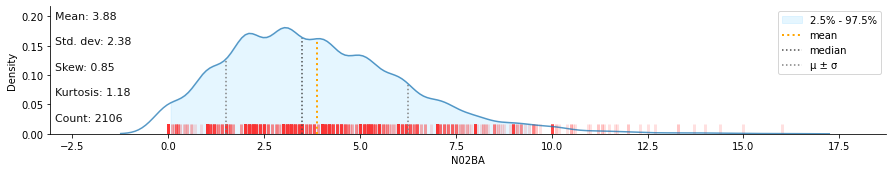

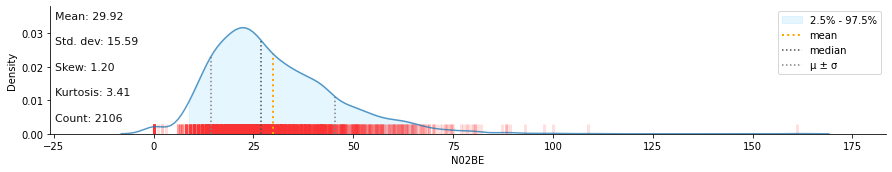

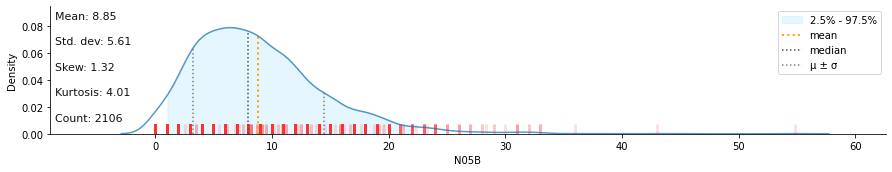

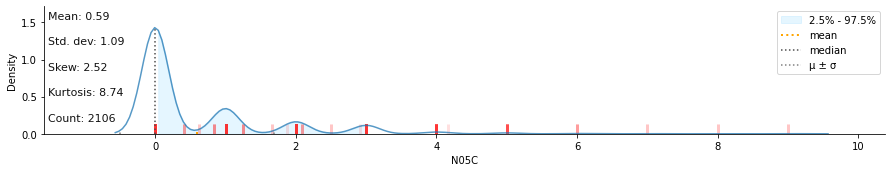

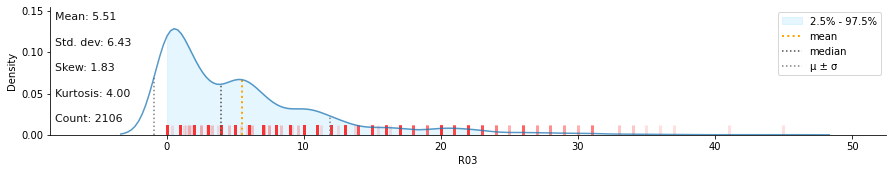

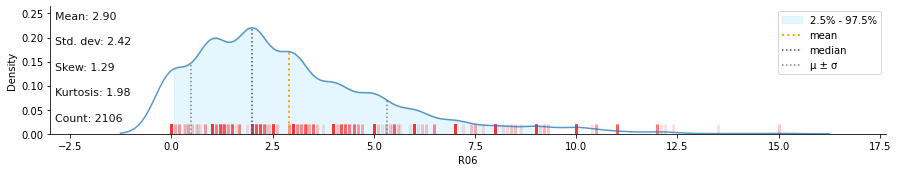

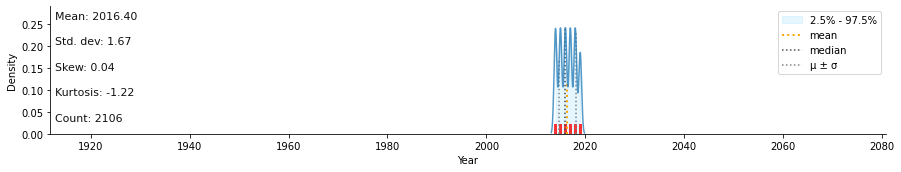

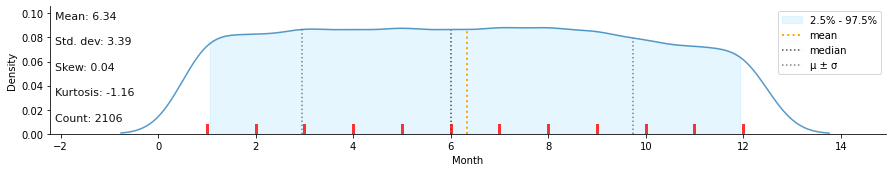

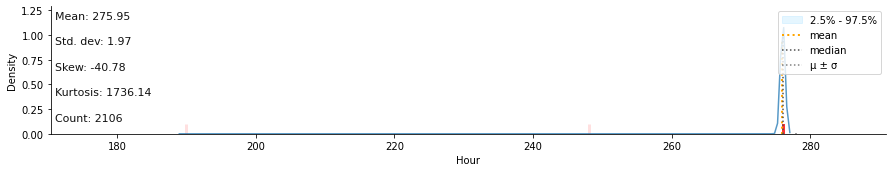

In [ ]:
klib.dist_plot(pharma_train) #return a distribution plot of every matrics



```
# This is formatted as code
```

DATA CLEANING USING KLIB LIBRARY

In [ ]:
klib.data_cleaning(pharma_train)

Shape of cleaned data: (2106, 13)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.1 MB (-47.62%)



,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06,year,month,hour,weekday_name
0,1/2/2014,0.0,3.67,3.4,32.400002,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.0,4.4,50.599998,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.0,6.5,61.849998,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.0,7.0,41.099998,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.0,4.5,21.700001,16.0,2.0,6.0,2.0,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.450001,13.0,0.0,1.0,1.0,2019,10,276,Friday
2102,10/5/2019,3.84,5.01,6.0,25.4,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.0,11.69,2.0,34.599998,6.0,0.0,5.0,4.2,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.0,50.799999,6.0,0.0,10.0,1.0,2019,10,276,Monday


In [ ]:
klib.clean_column_names(pharma_train)

,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06,year,month,hour,weekday_name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [ ]:
klib.convert_datatypes(pharma_train)


,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06,year,month,hour,weekday_name
0,1/2/2014,0.0,3.67,3.4,32.400002,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.0,4.4,50.599998,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.0,6.5,61.849998,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.0,7.0,41.099998,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.0,4.5,21.700001,16.0,2.0,6.0,2.0,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.450001,13.0,0.0,1.0,1.0,2019,10,276,Friday
2102,10/5/2019,3.84,5.01,6.0,25.4,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.0,11.69,2.0,34.599998,6.0,0.0,5.0,4.2,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.0,50.799999,6.0,0.0,10.0,1.0,2019,10,276,Monday


In [ ]:
klib.drop_missing(pharma_train)

,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06,year,month,hour,weekday_name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [ ]:
klib.mv_col_handling(pharma_train)

,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06,year,month,hour,weekday_name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [ ]:
klib.pool_duplicate_subsets(pharma_train)

,datum,m01ab,m01ae,n02ba,n02be,n05b,r03,r06,pooled_vars
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,2.00,0
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,20.0,4.00,1
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,9.0,1.00,2
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,3.0,0.00,3
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,6.0,2.00,4
...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,1.0,1.00,2101
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.33,2102
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,5.0,4.20,2103
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,10.0,1.00,2104


processing task before model building


In [ ]:
pharma_train

,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06,year,month,hour,weekday_name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


#Preprocessing Task before Model Building

1). Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:

pharma_train['weekday_name']= le.fit_transform(pharma_train['weekday_name'])



In [ ]:
pharma_train.head()

,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06,year,month,hour,weekday_name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,0,1,248,4
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,0,1,276,0
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,0,1,276,2
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,0,1,276,3
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,0,1,276,1


In [ ]:
pharma_train

,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06,year,month,hour,weekday_name
0,65,0,257,58,314,12,0,0,24,0,0,1,4
1,131,142,292,75,542,43,0,45,48,0,0,2,0
2,149,18,27,125,632,23,0,27,13,0,0,2,2
3,155,54,183,129,430,15,0,10,0,0,0,2,3
4,161,70,27,77,161,43,8,19,24,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,318,126,473,35,174,34,0,2,13,5,9,2,0
2102,324,50,412,113,219,12,0,0,4,5,9,2,2
2103,330,54,688,30,345,9,0,16,51,5,9,2,3
2104,336,126,359,50,544,9,0,30,13,5,9,2,1


# 2). Dividing the data 

In [ ]:
X=pharma_train.drop('weekday_name',axis=1)


In [ ]:
Y=pharma_train['weekday_name']

In [ ]:
Y

0       4
1       0
2       2
3       3
4       1
       ..
2101    0
2102    2
2103    3
2104    1
2105    5
Name: weekday_name, Length: 2106, dtype: int64

Splitting our data into train and test

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# 3). Standarization



In [ ]:
X.describe()

,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06,year,month,hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,1052.500000,76.761159,281.055556,67.186610,271.681387,19.698955,2.254036,14.946819,33.021368,2.401235,5.344255,1.998575
std,608.094154,51.999419,186.205697,43.552538,179.680314,15.988968,3.878627,14.587341,23.624115,1.665060,3.386954,0.048716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,526.250000,33.000000,120.000000,30.000000,125.000000,7.000000,0.000000,2.000000,13.000000,1.000000,2.000000,2.000000
50%,1052.500000,69.000000,257.000000,60.000000,242.000000,15.000000,0.000000,14.000000,24.000000,2.000000,5.000000,2.000000
75%,1578.750000,110.000000,427.750000,93.000000,397.000000,30.000000,4.000000,25.000000,48.000000,4.000000,8.000000,2.000000
max,2105.000000,217.000000,693.000000,198.000000,712.000000,76.000000,19.000000,63.000000,97.000000,5.000000,11.000000,2.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler() 

In [ ]:
X_train_std= sc.fit_transform(X_train)

In [ ]:
X_test_std= sc.transform(X_test)

In [ ]:
X_train_std

array([[ 1.20917228, -0.71510328,  2.01491324, ...,  0.95489436,
         0.47054021,  0.02437575],
       [-0.21677383,  0.23058975, -1.35594649, ..., -1.43181006,
        -1.0044965 ,  0.02437575],
       [-1.22873559, -0.11680769, -0.51187888, ...,  1.55157047,
         1.0605549 ,  0.02437575],
       ...,
       [ 1.6018003 , -0.58000427,  0.62977666, ...,  0.35821826,
         0.76554756,  0.02437575],
       [-0.1609188 ,  0.82888534, -0.85816303, ...,  0.95489436,
        -1.0044965 ,  0.02437575],
       [ 0.27935028,  0.09549074,  0.52156286, ..., -0.23845785,
        -0.41448181,  0.02437575]])

In [ ]:
X_test_std

array([[ 1.49666141,  1.63947936,  1.41432667, ...,  1.55157047,
         0.76554756,  0.02437575],
       [ 0.34506208, -1.31339887, -0.83110958, ..., -1.43181006,
        -0.41448181,  0.02437575],
       [ 0.47320009, -1.17829986,  0.53238424, ..., -1.43181006,
        -0.41448181,  0.02437575],
       ...,
       [ 1.69051123,  0.4814879 ,  0.08870768, ...,  0.35821826,
         0.76554756,  0.02437575],
       [ 0.51919835,  2.02547652,  1.16543494, ...,  0.95489436,
        -0.41448181,  0.02437575],
       [-0.86567788,  1.94827708, -0.85275234, ..., -1.43181006,
         1.65056958,  0.02437575]])

In [ ]:
Y_train

1687    4
81      1
2100    4
1130    3
157     3
       ..
599     1
1599    3
1361    3
1547    4
863     2
Name: weekday_name, Length: 1684, dtype: int64

In [ ]:
Y_test

2081    2
138     5
122     3
1521    2
1059    2
       ..
1058    0
1073    2
1342    5
1587    5
346     3
Name: weekday_name, Length: 422, dtype: int64

In [ ]:
#model Building 9linear regression and model forest 

Model Building

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [ ]:
lr.predict(X_test_std)

array([2.86959619, 3.05400112, 2.94510823, 2.9612806 , 2.86208606,
       3.12729229, 3.04502935, 3.2179207 , 3.11034468, 2.94802655,
       2.96043307, 3.10440504, 2.97218789, 3.02997414, 3.10219075,
       2.83338427, 3.08887816, 2.82002074, 2.93561889, 2.9781768 ,
       2.98674024, 3.28184893, 2.85156649, 2.89921301, 2.95296908,
       3.09861347, 3.02389198, 3.1414367 , 2.81577486, 3.02630305,
       2.89449896, 3.11564357, 2.84569742, 3.06105264, 3.05127785,
       3.01306609, 3.11628784, 2.88298593, 2.90245775, 2.91830751,
       2.9330065 , 3.07850418, 2.88107448, 2.8111128 , 3.13465338,
       2.97379163, 3.17868026, 2.97343495, 3.07930658, 3.05204983,
       3.14755171, 3.09884291, 3.14681614, 2.69816457, 2.94209164,
       2.81226799, 3.13827818, 3.10154594, 3.17855791, 2.88732086,
       2.69690209, 3.20429158, 2.87297795, 2.68903725, 2.77539092,
       2.95665169, 3.07996322, 2.73867023, 3.04989024, 3.23759047,
       3.22690689, 2.92746458, 2.96018927, 2.73225583, 3.20915

In [ ]:
Y_test

2081    2
138     5
122     3
1521    2
1059    2
       ..
1058    0
1073    2
1342    5
1587    5
346     3
Name: weekday_name, Length: 422, dtype: int64

In [ ]:
X_test.head()

,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06,year,month,hour
2081,1961,161,539,59,198,30,0,7,88,5,8,2
138,1260,8,124,129,243,23,4,0,46,0,4,2
122,1338,15,376,18,138,4,0,0,37,0,4,2
1521,958,142,122,149,419,30,4,30,48,4,2,2
1059,440,39,410,67,367,18,12,33,24,2,10,2


In [ ]:
Y_pred_lr= lr.predict(X_test_std)

In [ ]:

from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [ ]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error( Y_test,Y_pred_lr))



-0.005186239124253644
1.7048600890161356


In [ ]:
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

1.9908509877421101


#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [ ]:
rf.fit(X_train_std, Y_train)

RandomForestRegressor()

In [ ]:
Y_pred_rf=rf.predict(X_test_std)

In [ ]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error( Y_test,Y_pred_lr))

-0.005186239124253644
1.7048600890161356


In [ ]:
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

1.9908509877421101


In [ ]:
joblib.dump(rf,r'C:\Users\RAJU RANJAN\Desktop\Sales_forecasting\models\rf.sav')

['C:\\Users\\RAJU RANJAN\\Desktop\\Sales_forecasting\\models\\rf.sav']

#  Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model= RandomForestRegressor()

In [ ]:
n_estimators =[10,100,100]

In [ ]:
max_depth=range(1,31)

In [ ]:
min_samples_leaf=np.linspace(0.1,1.0)

In [ ]:
max_features=["auto","sqrt","log2"]

In [ ]:
min_samples_split=np.linspace(0.1,1.0,10)

In [ ]:
grid=dict(n_estimators=n_estimators)

In [ ]:
grid_search_forest=GridSearchCV(estimator=model,param_grid=grid, n_jobs=-1,scoring='r2',error_score=0,verbose=2,cv=2)

In [ ]:
grid_search_forest.fit(X_train,Y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, error_score=0, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 100]}, scoring='r2',
             verbose=2)

In [ ]:
print(f"Best: {grid_search_forest.best_score_:.3f} using{grid_search_forest.best_params_}")

Best: -0.086 using{'n_estimators': 100}


In [ ]:
means=grid_search_forest.cv_results_['mean_test_score']

In [ ]:
stds=grid_search_forest.cv_results_['std_test_score']

In [ ]:
params =grid_search_forest.cv_results_['params']

In [ ]:
for mean,stdev,param in zip(means, stds, params):
  print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

-0.180 (0.018) with: {'n_estimators': 10}
-0.088 (0.003) with: {'n_estimators': 100}
-0.086 (0.004) with: {'n_estimators': 100}


In [ ]:
grid_search_forest.best_params_

{'n_estimators': 100}

In [ ]:
grid_search_forest.best_score_

-0.08561093567729483

In [ ]:
grid_search_forest.predict(X_test)

array([3.01, 3.69, 3.03, 2.82, 2.74, 3.38, 2.29, 3.1 , 3.37, 3.83, 3.09,
       3.93, 2.26, 2.94, 2.83, 2.52, 3.66, 2.4 , 3.21, 3.07, 2.94, 3.04,
       2.59, 2.72, 3.18, 2.05, 3.08, 3.8 , 3.19, 2.79, 2.75, 3.6 , 3.3 ,
       3.42, 2.33, 3.63, 3.33, 2.94, 2.6 , 2.29, 2.72, 3.23, 3.15, 2.59,
       3.33, 2.72, 2.91, 3.51, 1.96, 3.3 , 2.92, 2.5 , 3.12, 2.56, 2.71,
       3.21, 2.75, 2.99, 3.41, 2.15, 2.66, 3.77, 1.45, 2.56, 2.82, 3.19,
       2.92, 2.73, 3.94, 3.17, 3.37, 2.89, 2.92, 3.01, 3.02, 3.23, 4.24,
       2.65, 2.93, 3.07, 3.19, 2.2 , 2.67, 2.62, 2.88, 2.75, 2.04, 2.91,
       2.45, 3.23, 2.78, 3.21, 2.53, 3.04, 2.44, 3.26, 2.98, 1.15, 2.91,
       2.65, 3.31, 2.56, 2.4 , 3.  , 3.11, 3.31, 3.23, 3.25, 2.15, 2.79,
       2.9 , 2.97, 3.54, 3.09, 3.1 , 2.66, 3.36, 3.44, 3.04, 3.37, 2.27,
       3.55, 2.64, 3.23, 2.63, 3.45, 3.51, 2.98, 3.37, 2.8 , 3.66, 1.87,
       3.64, 2.46, 2.91, 2.8 , 2.74, 2.46, 3.18, 2.56, 2.81, 2.72, 2.6 ,
       2.38, 3.2 , 3.62, 2.56, 3.8 , 2.65, 2.57, 2.

In [ ]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [ ]:
r2_score(Y_test,Y_pred_rf_grid)

-0.10402431414769753

# SAVE YOUR  MODEL

In [ ]:
import joblib

In [ ]:
 joblib.dump(grid_search_forest,r'C:\Users\RAJU RANJAN\Desktop\Sales_forecasting\random_form_grid.sav')

['C:\\Users\\RAJU RANJAN\\Desktop\\Sales_forecasting\\random_form_grid.sav']

In [ ]:
model=joblib.load(r'C:\Users\RAJU RANJAN\Desktop\Sales_forecasting\random_form_grid.sav')

In [ ]:
model.predict(X_test_std)

array([1.19, 3.32, 3.31, 3.32, 3.2 , 3.21, 3.2 , 2.82, 3.32, 1.56, 2.86,
       2.96, 3.28, 1.59, 2.94, 2.9 , 3.2 , 3.25, 3.31, 3.  , 3.14, 3.28,
       3.28, 3.31, 3.2 , 2.94, 3.25, 3.3 , 1.37, 1.64, 2.93, 3.27, 3.22,
       3.31, 2.93, 1.59, 3.32, 3.26, 3.15, 3.28, 1.85, 3.34, 1.07, 3.35,
       1.62, 3.27, 3.34, 2.86, 3.38, 3.31, 1.61, 3.32, 3.36, 1.34, 2.83,
       3.31, 3.21, 2.76, 3.28, 3.31, 3.3 , 3.33, 3.34, 3.34, 3.26, 3.29,
       2.94, 3.19, 3.29, 3.29, 2.86, 2.97, 2.8 , 2.92, 3.32, 3.28, 3.28,
       3.3 , 2.93, 2.93, 3.28, 2.88, 3.33, 2.95, 3.31, 3.28, 3.27, 3.3 ,
       2.93, 3.29, 1.72, 3.32, 3.34, 2.93, 3.23, 2.97, 2.78, 1.62, 2.9 ,
       2.88, 3.28, 2.86, 3.28, 2.78, 3.31, 3.23, 1.57, 1.13, 3.35, 2.85,
       2.83, 3.3 , 2.87, 2.85, 3.25, 2.92, 3.23, 2.95, 3.3 , 3.32, 2.93,
       2.92, 2.93, 2.93, 2.92, 3.21, 3.32, 3.2 , 3.2 , 3.27, 3.31, 2.95,
       3.33, 2.94, 3.29, 3.21, 2.94, 1.05, 2.83, 3.33, 2.93, 3.19, 2.86,
       3.04, 1.49, 3.32, 1.71, 3.24, 1.85, 1.87, 3.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
joblib.dump(sc,r'C:\Users\RAJU RANJAN\Desktop\Sales_forecasting\models\sc.sav')

['C:\\Users\\RAJU RANJAN\\Desktop\\Sales_forecasting\\models\\sc.sav']